## YOLO Model Training Notebook

This is a notebook for the BYU Locating Bacterial Flagellar Motors 2025 Kaggle challenge, inspired by @andrewjdarley . This notebook handles the training of YOLOv8 object detection models on our prepared dataset.

## About this Notebook

This training notebook implements a full YOLOv8 training pipeline for detecting bacterial flagellar motors in tomographic slices. The notebook:

1. **Dataset Configuration**: Sets up and validates the YOLO-format dataset YAML configuration
2. **Model Initialization**: Loads pre-trained YOLOv8m weights for transfer learning
3. **Training Process**: Fine tunes the model with early stopping and periodic checkpoints
4. **Loss Visualization**: Plots training and validation dfl loss curves to monitor progress
5. **Performance Evaluation**: Tests the trained model on random validation samples
6. **Model Export**: Saves the trained weights for use in the submission notebook

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.0 MB/s eta 0:00:00


In [2]:
import os
import torch
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics import YOLO
import yaml
import pandas as pd
import json
import torch.nn as nn
from ultralytics import YOLO
from ultralytics.nn.modules import Conv, C2f
from typing import List, Optional, Dict, Any, Union


# Setting random seeds for reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

# Define paths for Kaggle environment outputs
yolo_dataset_dir = "/kaggle/input/parse-data/yolo_dataset"
yolo_weights_dir = "/kaggle/working/yolo_weights"
yolo_pretrained_weights = "yolov8m.pt"  # Path to pre-downloaded weights

# Create weights directory if it doesn't exist
os.makedirs(yolo_weights_dir, exist_ok=True)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Starting YOLO training process...
Directory status:
- Train images dir exists: True
- Val images dir exists: True
- Train labels dir exists: True
- Val labels dir exists: True
Found original dataset.yaml at /kaggle/input/parse-data/yolo_dataset/dataset.yaml
Fixing YAML paths in /kaggle/input/parse-data/yolo_dataset/dataset.yaml
Created fixed YAML at /kaggle/working/fixed_dataset.yaml with path: /kaggle/input/parse-data/yolo_dataset
Using YAML file: /kaggle/working/fixed_dataset.yaml
YAML file contents:
names:
  0: motor
path: /kaggle/input/parse-data/yolo_dataset
train: images/train
val: images/val


Starting YOLO training...
Loading pre-trained weights from: yolov8m.pt


100%|██████████| 49.7M/49.7M [00:00<00:00, 223MB/s]


Using standard YOLOv8 architecture
Ultralytics 8.3.119 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/fixed_dataset.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=2, cache=False, device=0, workers=8, project=runs/detect, name=motor_detector, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 16.7MB/s]

Overriding class names with single class.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 40.4±14.4 MB/s, size: 345.6 KB)


train: Scanning /kaggle/input/parse-data/yolo_dataset/labels/train... 3262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3262/3262 [00:20<00:00, 159.97it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/parse-data/yolo_dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 36.8±3.8 MB/s, size: 365.7 KB)


val: Scanning /kaggle/input/parse-data/yolo_dataset/labels/val... 792 images, 0 backgrounds, 0 corrupt: 100%|██████████| 792/792 [00:05<00:00, 138.43it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/parse-data/yolo_dataset/labels is not writeable, cache not saved.
Plotting labels to runs/detect/motor_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/motor_detector
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.2G      3.535      6.317      1.623         54        640: 100%|██████████| 102/102 [01:42<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]

                   all        792        792   0.000518      0.149   0.000302   0.000101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.5G      2.823      2.573      1.286         44        640: 100%|██████████| 102/102 [01:46<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.18it/s]

                   all        792        792      0.392      0.427      0.299     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.1G      2.716      2.443      1.253         65        640: 100%|██████████| 102/102 [01:47<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.017       0.46     0.0101    0.00212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.7G      2.629      2.328      1.232         59        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.538      0.563      0.461      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.1G      2.611      2.179      1.215         60        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.531      0.409      0.342        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.6G      2.524      2.127      1.185         55        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.637       0.61      0.602      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        12G      2.522      2.091      1.188         56        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.702      0.722      0.688      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.6G       2.41      1.903      1.151         53        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.771      0.728      0.763      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        12G      2.442      1.931      1.161         57        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.738      0.678      0.694      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.7G      2.396      1.845      1.141         39        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.798      0.713      0.771      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        12G      2.335      1.811      1.135         41        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.841      0.742      0.788      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.7G      2.338       1.78       1.13         38        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792       0.76      0.699      0.742      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        12G      2.322      1.758       1.13         50        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.797      0.698      0.763      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.6G      2.296      1.731      1.127         57        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.836      0.761      0.841      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.1G      2.275      1.648      1.111         49        640: 100%|██████████| 102/102 [01:50<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.05it/s]

                   all        792        792      0.835      0.772      0.796        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.6G      2.245      1.681        1.1         45        640: 100%|██████████| 102/102 [01:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

                   all        792        792      0.793      0.647      0.657      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.1G      2.214      1.615      1.092         51        640: 100%|██████████| 102/102 [01:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

                   all        792        792      0.874      0.759       0.82      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.7G      2.236      1.645      1.087         46        640: 100%|██████████| 102/102 [01:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

                   all        792        792      0.837       0.81      0.863      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.1G      2.212      1.563      1.082         52        640: 100%|██████████| 102/102 [01:56<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

                   all        792        792      0.829       0.76      0.827      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.7G      2.205      1.571      1.074         45        640: 100%|██████████| 102/102 [01:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        792        792      0.855      0.798      0.838      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        12G      2.202      1.583      1.079         49        640: 100%|██████████| 102/102 [01:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.05it/s]

                   all        792        792       0.86      0.778      0.829      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.7G      2.148      1.549      1.063         42        640: 100%|██████████| 102/102 [01:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

                   all        792        792      0.856      0.822      0.868      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.1G      2.161      1.531      1.061         64        640: 100%|██████████| 102/102 [01:53<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

                   all        792        792      0.856      0.824      0.858      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.6G      2.127      1.516      1.057         49        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.847      0.844      0.887      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        12G      2.099       1.46      1.055         59        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.863      0.842      0.881      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.7G      2.127      1.466      1.054         55        640: 100%|██████████| 102/102 [01:47<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.878      0.842      0.873      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        12G      2.139      1.462      1.053         44        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.869      0.802      0.879      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.6G      2.102      1.426      1.045         45        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.859      0.833      0.871       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.1G      2.115      1.433       1.05         47        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.874      0.835      0.866      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.7G      2.077      1.437       1.04         47        640: 100%|██████████| 102/102 [01:47<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.851      0.827      0.885      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.1G      2.049      1.427      1.036         50        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.857      0.832      0.882      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.6G      2.052      1.389       1.03         41        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        792        792      0.877      0.862      0.895      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.1G      2.042      1.392      1.026         49        640: 100%|██████████| 102/102 [01:47<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792       0.82      0.834      0.851      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.6G      2.033      1.392      1.033         56        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.863      0.866      0.876      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        12G      2.018       1.36      1.017         46        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.859      0.862      0.905      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.6G      2.029      1.372      1.032         56        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.861      0.874      0.904      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.1G      2.014      1.358      1.021         49        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.852      0.876      0.911      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.7G      1.989      1.317      1.021         60        640: 100%|██████████| 102/102 [01:47<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.859      0.886      0.916      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        12G      1.982      1.318      1.012         50        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.874      0.869      0.905      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.1G      1.987      1.316      1.017         49        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.859      0.897      0.907      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.7G      1.971      1.306      1.008         45        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.896      0.866      0.908      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.1G      1.994       1.33      1.014         67        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.891      0.874      0.917      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.7G      1.946       1.31      1.006         38        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.868       0.88      0.912      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.1G      1.974        1.3      1.016         61        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

                   all        792        792      0.861      0.873      0.908      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.6G      1.948      1.271     0.9976         43        640: 100%|██████████| 102/102 [01:57<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

                   all        792        792      0.852      0.885      0.908      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        12G      1.935       1.29      1.002         55        640: 100%|██████████| 102/102 [01:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

                   all        792        792      0.875      0.862      0.906      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.6G      1.933      1.256     0.9993         60        640: 100%|██████████| 102/102 [01:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        792        792      0.849      0.905      0.923      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.1G      1.905       1.26      1.002         43        640: 100%|██████████| 102/102 [01:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

                   all        792        792      0.886       0.88      0.914      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.7G      1.911      1.253      1.002         53        640: 100%|██████████| 102/102 [01:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

                   all        792        792      0.876      0.863      0.915      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.1G      1.919      1.254     0.9998         54        640: 100%|██████████| 102/102 [01:57<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

                   all        792        792      0.881       0.86      0.909      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.7G      1.906      1.261     0.9941         49        640: 100%|██████████| 102/102 [01:58<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

                   all        792        792      0.868      0.864      0.906      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.1G      1.893      1.261     0.9871         47        640: 100%|██████████| 102/102 [01:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

                   all        792        792      0.857      0.884      0.918      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.7G      1.879      1.225      0.992         48        640: 100%|██████████| 102/102 [01:50<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792       0.89      0.859      0.918      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.1G      1.876      1.223     0.9944         48        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.872      0.874      0.917      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.6G      1.862      1.223     0.9888         55        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.876      0.882      0.906      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.1G      1.852      1.209     0.9796         39        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.883      0.883      0.911      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.7G      1.848      1.217     0.9808         52        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.897      0.866      0.921      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        12G       1.84      1.202     0.9851         52        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

                   all        792        792      0.886      0.892      0.926      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.7G      1.848      1.225     0.9793         44        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.891      0.875      0.926      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.1G      1.818      1.196     0.9812         35        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.873      0.878      0.919      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.7G      1.829      1.184     0.9744         46        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.888      0.863      0.922      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.1G      1.812      1.177     0.9709         53        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.886      0.902       0.94      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.7G      1.808      1.177     0.9784         44        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.875      0.889      0.926      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.1G      1.829      1.182     0.9843         47        640: 100%|██████████| 102/102 [01:49<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        792        792      0.861      0.893      0.928      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.7G      1.811      1.143      0.974         49        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.873      0.898       0.93      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.1G      1.791      1.164     0.9751         54        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.866      0.895      0.927      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.6G      1.787      1.144     0.9676         50        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.873      0.893      0.927       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      12.1G      1.788      1.162     0.9691         53        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.857      0.899      0.919      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.7G      1.768      1.141     0.9697         57        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.874      0.902       0.93      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.1G      1.756      1.131     0.9658         43        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.861      0.898      0.927      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.6G      1.749      1.128     0.9622         45        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.877      0.898      0.931      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.1G      1.755      1.117     0.9629         51        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.893      0.894       0.94      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.7G      1.739       1.12      0.966         52        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

                   all        792        792      0.877      0.875       0.92      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        12G      1.733      1.124     0.9621         48        640: 100%|██████████| 102/102 [01:58<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

                   all        792        792      0.884      0.888      0.934      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.6G      1.732      1.092     0.9602         45        640: 100%|██████████| 102/102 [01:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        792        792      0.889      0.876      0.933      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.1G      1.753       1.12     0.9621         50        640: 100%|██████████| 102/102 [01:58<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

                   all        792        792      0.879      0.891      0.924      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.6G      1.735      1.111     0.9562         51        640: 100%|██████████| 102/102 [01:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

                   all        792        792      0.886      0.891       0.93      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.1G      1.711      1.118      0.952         51        640: 100%|██████████| 102/102 [01:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

                   all        792        792      0.862      0.906      0.921      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.6G      1.722      1.106     0.9567         55        640: 100%|██████████| 102/102 [01:58<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

                   all        792        792      0.859      0.892      0.921      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.1G       1.71      1.087     0.9513         47        640: 100%|██████████| 102/102 [01:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.05it/s]

                   all        792        792      0.865      0.896      0.924      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.6G      1.709      1.087     0.9534         53        640: 100%|██████████| 102/102 [01:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        792        792      0.866      0.916      0.929      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.1G      1.714      1.094     0.9552         46        640: 100%|██████████| 102/102 [01:51<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792       0.87      0.913      0.943      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.6G      1.714      1.074     0.9547         55        640: 100%|██████████| 102/102 [01:50<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.878      0.901      0.932      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.1G      1.687      1.063     0.9581         47        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.878      0.896      0.926      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.7G      1.705      1.076     0.9473         48        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.866      0.907      0.931      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.1G      1.709      1.068     0.9515         42        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.868      0.896      0.931      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.6G      1.673      1.052     0.9469         37        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.881      0.893       0.94      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.1G      1.678       1.07     0.9458         52        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.868      0.909      0.934      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.6G       1.68      1.054     0.9431         62        640: 100%|██████████| 102/102 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.866      0.896      0.938      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.1G      1.667      1.047     0.9405         44        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.867      0.891      0.932      0.482


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.7G      1.441     0.7987     0.9219         29        640: 100%|██████████| 102/102 [01:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.856      0.905      0.927      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.1G      1.415     0.7806     0.9218         27        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.855      0.901      0.927      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.7G      1.402     0.7744     0.9151         28        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        792        792      0.854       0.92      0.927      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.1G      1.392     0.7653     0.9138         29        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.862      0.891      0.927      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.7G      1.383     0.7617     0.9125         27        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.17it/s]

                   all        792        792      0.847      0.907      0.925      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      12.1G      1.391     0.7678     0.9115         29        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.869      0.884      0.927       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.7G      1.366     0.7651      0.914         25        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        792        792      0.863        0.9      0.931      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.1G       1.35     0.7438     0.9081         25        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        792        792      0.873      0.893      0.933      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.6G      1.378     0.7574       0.91         26        640: 100%|██████████| 102/102 [01:47<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.17it/s]

                   all        792        792      0.872      0.899      0.932      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        12G      1.337     0.7474     0.9043         24        640: 100%|██████████| 102/102 [01:48<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        792        792      0.866      0.901       0.93      0.495



100 epochs completed in 3.422 hours.
Optimizer stripped from runs/detect/motor_detector/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/motor_detector/weights/best.pt, 52.0MB

Validating runs/detect/motor_detector/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.00it/s]


                   all        792        792      0.884      0.888      0.934      0.527


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 10.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/motor_detector
Loss curve saved to runs/detect/motor_detector/dfl_loss_curve.png

Best model found at epoch 84 with validation DFL loss: 0.8411

Training complete!

Running predictions on sample images...

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_ba9b3d_z0138_y0856_x0343.jpg: 640x640 1 item, 34.6ms
Speed: 2.7ms preprocess, 34.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_285d15_z0135_y0391_x0611.jpg: 640x640 1 item, 34.6ms
Speed: 2.8ms preprocess, 34.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_ff505c_z0112_y0816_x0678.jpg: 640x640 1 item, 34.6ms
Speed: 2.6ms preprocess, 34.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yo

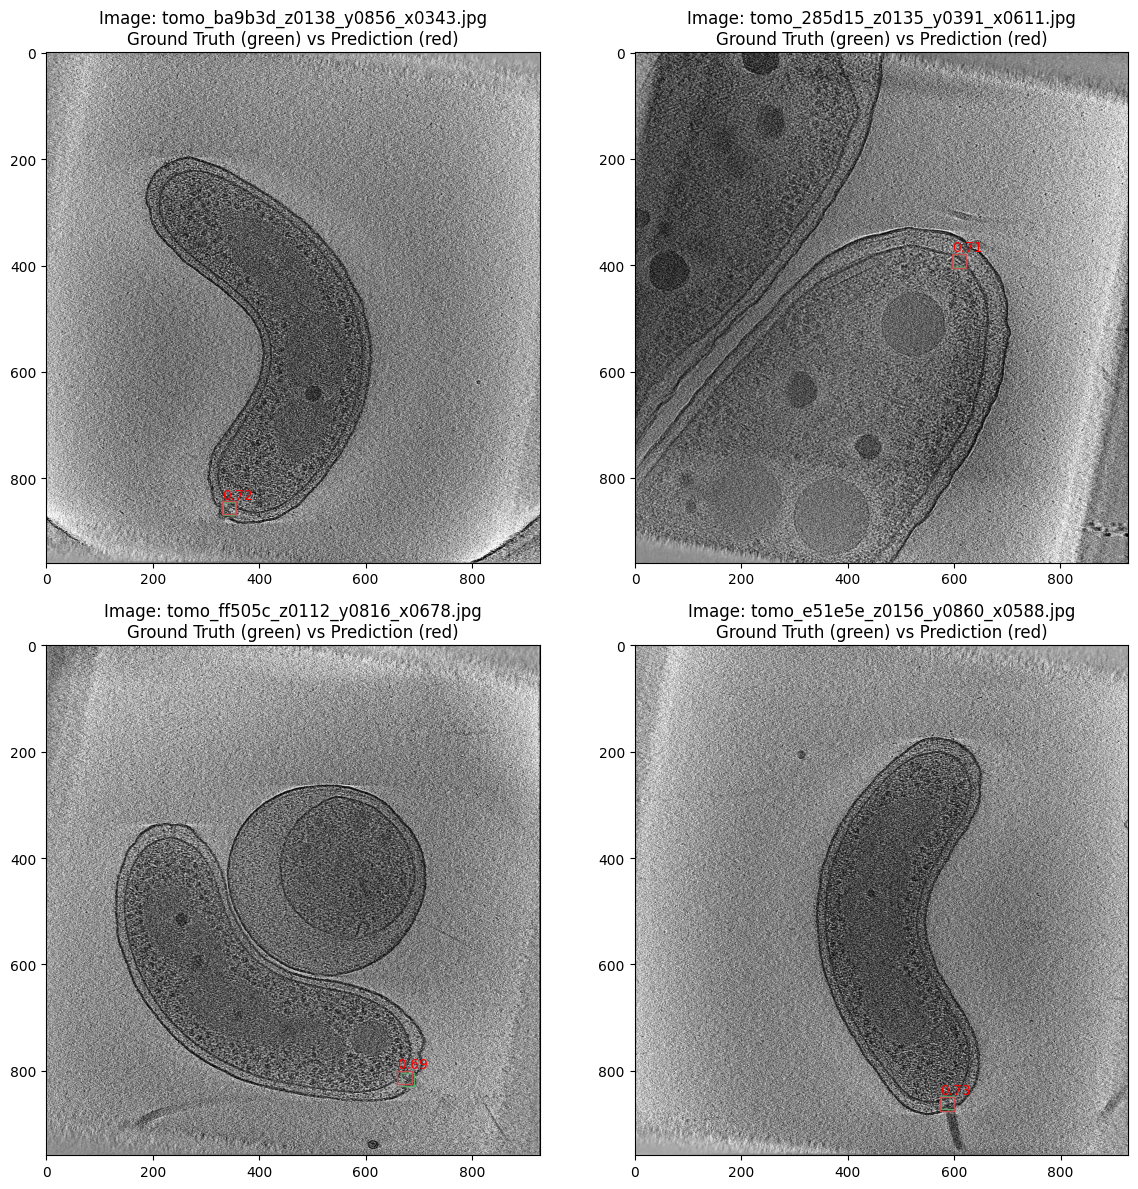

In [4]:
def fix_yaml_paths(yaml_path):
    """
    Fix the paths in the YAML file to match the actual Kaggle directories
    
    Args:
        yaml_path (str): Path to the original dataset YAML file
        
    Returns:
        str: Path to the fixed YAML file
    """
    print(f"Fixing YAML paths in {yaml_path}")
    
    # Read the original YAML
    with open(yaml_path, 'r') as f:
        yaml_data = yaml.safe_load(f)
    
    # Update paths to use actual dataset location
    if 'path' in yaml_data:
        yaml_data['path'] = yolo_dataset_dir
    
    # Create a new fixed YAML in the working directory
    fixed_yaml_path = "/kaggle/working/fixed_dataset.yaml"
    with open(fixed_yaml_path, 'w') as f:
        yaml.dump(yaml_data, f)
    
    print(f"Created fixed YAML at {fixed_yaml_path} with path: {yaml_data.get('path')}")
    return fixed_yaml_path

def plot_dfl_loss_curve(run_dir):
    """
    Plot the DFL loss curves for train and validation, marking the best model
    
    Args:
        run_dir (str): Directory where the training results are stored
    """
    # Loading path to the results CSV file
    results_csv = os.path.join(run_dir, 'results.csv')
    
    if not os.path.exists(results_csv):
        print(f"Results file not found at {results_csv}")
        return
    
    # Reading results CSV
    results_df = pd.read_csv(results_csv)
    
    # Checking if DFL loss columns exist
    train_dfl_col = [col for col in results_df.columns if 'train/dfl_loss' in col]
    val_dfl_col = [col for col in results_df.columns if 'val/dfl_loss' in col]
    
    if not train_dfl_col or not val_dfl_col:
        print("DFL loss columns not found in results CSV")
        print(f"Available columns: {results_df.columns.tolist()}")
        return
    
    train_dfl_col = train_dfl_col[0]
    val_dfl_col = val_dfl_col[0]
    
    # Finding the epoch with the best validation loss
    best_epoch = results_df[val_dfl_col].idxmin()
    best_val_loss = results_df.loc[best_epoch, val_dfl_col]
    
    # Creating the plot
    plt.figure(figsize=(10, 6))
    
    # Plotting training and validation losses
    plt.plot(results_df['epoch'], results_df[train_dfl_col], label='Train DFL Loss')
    plt.plot(results_df['epoch'], results_df[val_dfl_col], label='Validation DFL Loss')
    
    # Mark the best model with a vertical line
    plt.axvline(x=results_df.loc[best_epoch, 'epoch'], color='r', linestyle='--', 
                label=f'Best Model (Epoch {int(results_df.loc[best_epoch, "epoch"])}, Val Loss: {best_val_loss:.4f})')
    
    # Add labels and legend
    plt.xlabel('Epoch')
    plt.ylabel('DFL Loss')
    plt.title('Training and Validation DFL Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the plot in the same directory as weights
    plot_path = os.path.join(run_dir, 'dfl_loss_curve.png')
    plt.savefig(plot_path)
    
    # Also save it to the working directory for easier access
    plt.savefig(os.path.join('/kaggle/working', 'dfl_loss_curve.png'))
    
    print(f"Loss curve saved to {plot_path}")
    plt.close()
    
    # Return the best epoch info
    return best_epoch, best_val_loss

def train_yolo_model(yaml_path, pretrained_weights_path, epochs=30, batch_size=16, img_size=640, 
                     yolo_weights_dir='runs/detect', devices=0):
    """
    Train a YOLO model on the prepared dataset 
    
    Args:
        yaml_path (str): Path to the dataset YAML file
        pretrained_weights_path (str): Path to pre-downloaded weights file
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training
        img_size (int): Image size for training
        yolo_weights_dir (str): Directory to save training results
    """
    print(f"Loading pre-trained weights from: {pretrained_weights_path}")
    
    # Loading the standard YOLOv8 model
    model = YOLO(pretrained_weights_path)
    
    
    print("Using standard YOLOv8 architecture")
    
    # Train the model 
    results = model.train(
        data=yaml_path,
        epochs=epochs,
        batch=batch_size,
        imgsz=img_size,
        project=yolo_weights_dir,
        device=devices,
        name='motor_detector',
        exist_ok=True,
        # patience=10,              # Removing the early stopping
        save_period=2,           # Save checkpoints every 5 epochs
        val=True,                # Ensure validation is performed
        verbose=True,             # Show detailed output during training
        single_cls=True,
        degrees=180,                # Our custom based augmentation techinique in an attempt to make the model better, rotating the image 180 degrees
        translate=0.2,                 # Randomly Shifts the Image 
        shear=2.0,                      # Shear transformation, Adds minor geometric distortion, simulating different viewing angles or slants.
        perspective=0.001,              # Adding a perspective warp
        flipud=0.5,                     # Vertically flippin the image with 50% probability
        fliplr=0.5,                     # Horizontally flipping the image with 50% probability
        mixup=0.25                      # With 25% probability, mixes two training images and their labels by blending them.
    )
    
    # Get the path to the running directory
    run_dir = os.path.join(yolo_weights_dir, 'motor_detector')
    
    # Plot and save the loss curve
    best_epoch_info = plot_dfl_loss_curve(run_dir)
    
    if best_epoch_info:
        best_epoch, best_val_loss = best_epoch_info
        print(f"\nBest model found at epoch {best_epoch} with validation DFL loss: {best_val_loss:.4f}")
    
    return model, results


def predict_on_samples(model, num_samples=4, conf_threshold=0.25):
    """
    Run predictions on random validation samples and display results
    
    Args:
        model: Trained YOLO model
        num_samples (int): Number of random samples to test
    """
    # Getting the validation images
    val_dir = os.path.join(yolo_dataset_dir, 'images', 'val')
    if not os.path.exists(val_dir):
        print(f"Validation directory not found at {val_dir}")
        # Try train directory instead if val doesn't exist
        val_dir = os.path.join(yolo_dataset_dir, 'images', 'train')
        print(f"Using train directory for predictions instead: {val_dir}")
        
    if not os.path.exists(val_dir):
        print("No images directory found for predictions")
        return
    
    val_images = os.listdir(val_dir)
    
    if len(val_images) == 0:
        print("No images found for prediction")
        return
    
    # Select random samples
    num_samples = min(num_samples, len(val_images))
    samples = random.sample(val_images, num_samples)
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    for i, img_file in enumerate(samples):
        if i >= len(axes):
            break
            
        img_path = os.path.join(val_dir, img_file)
        
        # Run prediction
        results = model.predict(img_path, conf=conf_threshold, batch=4)[0]
        
        # Load and display the image
        img = Image.open(img_path)
        axes[i].imshow(np.array(img), cmap='gray')
        
        # Draw ground truth box if available (from filename)
        try:
            # This assumes your filenames contain coordinates in a specific format
            parts = img_file.split('_')
            y_part = [p for p in parts if p.startswith('y')]
            x_part = [p for p in parts if p.startswith('x')]
            
            if y_part and x_part:
                y_gt = int(y_part[0][1:])
                x_gt = int(x_part[0][1:].split('.')[0])
                
                box_size = 24
                rect_gt = Rectangle((x_gt - box_size//2, y_gt - box_size//2), 
                              box_size, box_size, 
                              linewidth=1, edgecolor='g', facecolor='none')
                axes[i].add_patch(rect_gt)
        except:
            pass  # Skip ground truth if parsing fails
        
        # Draw predicted boxes (red)
        if len(results.boxes) > 0:
            boxes = results.boxes.xyxy.cpu().numpy()
            confs = results.boxes.conf.cpu().numpy()
            
            for box, conf in zip(boxes, confs):
                x1, y1, x2, y2 = box
                rect_pred = Rectangle((x1, y1), x2-x1, y2-y1, 
                                     linewidth=1, edgecolor='r', facecolor='none')
                axes[i].add_patch(rect_pred)
                axes[i].text(x1, y1-5, f'{conf:.2f}', color='red')
        
        axes[i].set_title(f"Image: {img_file}\nGround Truth (green) vs Prediction (red)")
    
    plt.tight_layout()
    
    # Save the predictions plot
    plt.savefig(os.path.join('/kaggle/working', 'predictions.png'))
    plt.show()

# Check and create a dataset YAML if needed
def prepare_dataset():
    """
    Check if dataset exists and create a proper YAML if needed
    
    Returns:
        str: Path to the YAML file to use for training
    """
    # Check if images exist
    train_images_dir = os.path.join(yolo_dataset_dir, 'images', 'train')
    val_images_dir = os.path.join(yolo_dataset_dir, 'images', 'val')
    train_labels_dir = os.path.join(yolo_dataset_dir, 'labels', 'train')
    val_labels_dir = os.path.join(yolo_dataset_dir, 'labels', 'val')
    
    # Print directory existence status
    print(f"Directory status:")
    print(f"- Train images dir exists: {os.path.exists(train_images_dir)}")
    print(f"- Val images dir exists: {os.path.exists(val_images_dir)}")
    print(f"- Train labels dir exists: {os.path.exists(train_labels_dir)}")
    print(f"- Val labels dir exists: {os.path.exists(val_labels_dir)}")
    
    # Check for original YAML file
    original_yaml_path = os.path.join(yolo_dataset_dir, 'dataset.yaml')
    
    if os.path.exists(original_yaml_path):
        print(f"Found original dataset.yaml at {original_yaml_path}")
        # Fix the paths in the YAML
        return fix_yaml_paths(original_yaml_path)
    else:
        print(f"Original dataset.yaml not found, creating a new one")
        
        # Create a new YAML file
        yaml_data = {
            'path': yolo_dataset_dir,
            'train': 'images/train',
            'val': 'images/train' if not os.path.exists(val_images_dir) else 'images/val',
            'names': {0: 'motor'}
        }
        
        new_yaml_path = "/kaggle/working/dataset.yaml"
        with open(new_yaml_path, 'w') as f:
            yaml.dump(yaml_data, f)
            
        print(f"Created new YAML at {new_yaml_path}")
        return new_yaml_path

# Main execution
def main():
    print("Starting YOLO training process...")
    
    # Prepare dataset and get YAML path
    yaml_path = prepare_dataset()
    print(f"Using YAML file: {yaml_path}")
    
    # Print YAML file contents
    with open(yaml_path, 'r') as f:
        yaml_content = f.read()
    print(f"YAML file contents:\n{yaml_content}")
    
    # Train model
    print("\nStarting YOLO training...")
    model, results = train_yolo_model(
        yaml_path,
        pretrained_weights_path=yolo_pretrained_weights,
        batch_size=32,
        epochs=100,  # Using 30 epochs instead of 100 for faster training
        devices=0,
    )
    
    print("\nTraining complete!")
    
    # Run predictions
    print("\nRunning predictions on sample images...")
    predict_on_samples(model, num_samples=4, conf_threshold=0.1)

if __name__ == "__main__":
    main()